### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量，文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的活跃情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

Human:18588,Bot:1191


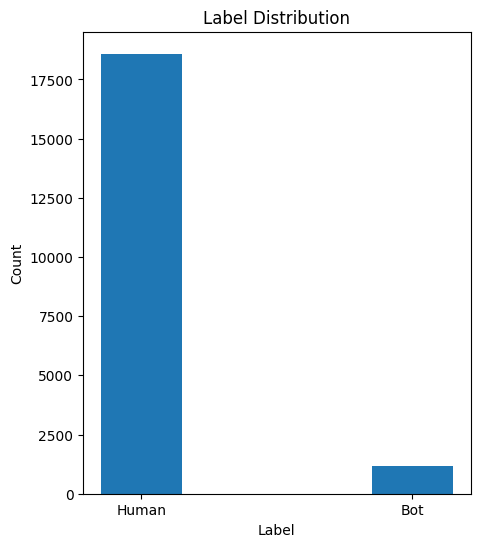

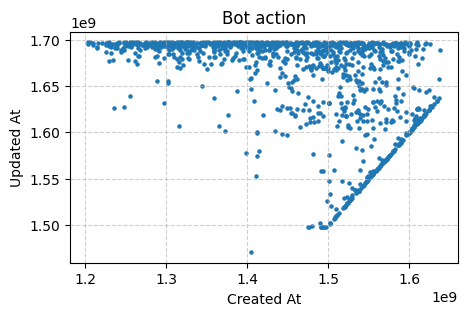

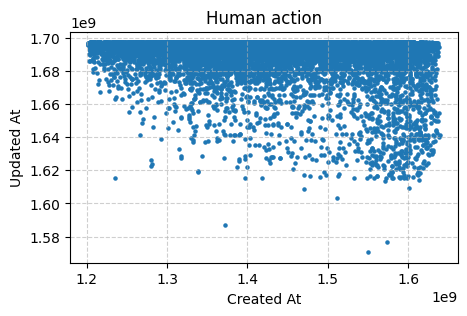

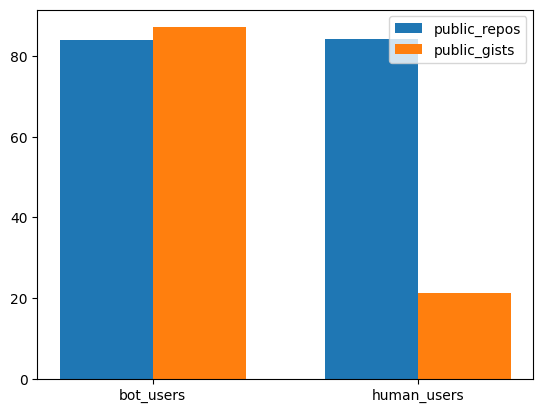

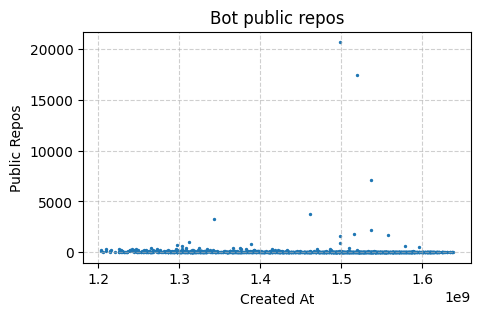

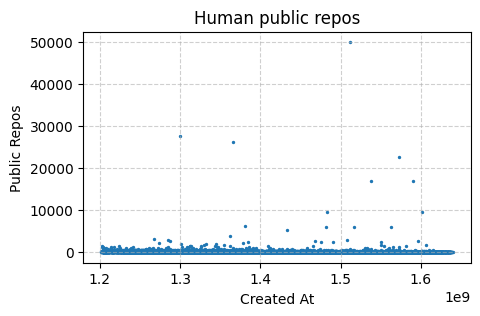

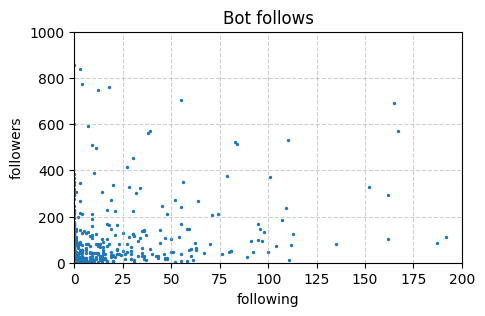

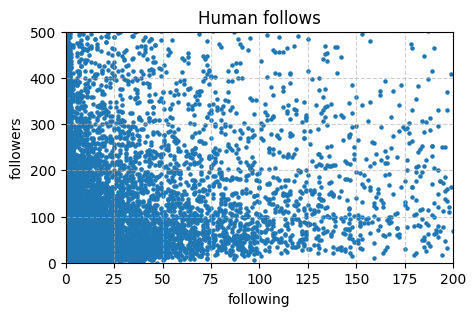

In [35]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
count_before = len(raw_data)
dropped_data = raw_data.drop_duplicates()
count_after = len(dropped_data)
#print(f'原数据量：{count_before}，删除后的数据量：{count_after}')
df = dropped_data.drop(columns = ['gravatar_id'])
missing_values = df.isnull().sum()
#print(missing_values)
df['site_admin'] = df['site_admin'].apply(lambda x: bool(x) if pd.notna(x) else False)
df['hireable'] = df['hireable'].apply(lambda x: bool(x) if pd.notna(x) else False)
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].fillna('')
missing_values = df.isnull().sum()
#print(missing_values)
df['created_at'] = pd.to_datetime(df['created_at']).astype('int64') // 10**9
df['updated_at'] = pd.to_datetime(df['updated_at']).astype('int64') // 10**9
#print(df['created_at'])

#4.1
import matplotlib.pyplot as plt
Human_count = df['label'].value_counts()['Human']
Bot_count = df['label'].value_counts()['Bot']
print(f'Human:{Human_count},Bot:{Bot_count}')
x = ['Human', 'Bot']
y = [Human_count, Bot_count]
plt.figure(figsize=(5, 6))
plt.bar(x, y, width = 0.3,align='center')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

#4.2
bot_users = df[df['label'] == 'Bot']
human_users = df[df['label'] == 'Human']
x = bot_users['created_at']
y = bot_users['updated_at']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 5)
plt.xlabel('Created At')
plt.ylabel('Updated At')
plt.title('Bot action')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#4.3
x = human_users['created_at']
y = human_users['updated_at']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 5)
plt.xlabel('Created At')
plt.ylabel('Updated At')
plt.title('Human action')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

import numpy as np
categories = ['bot_users', 'human_users']
values1 = [bot_users['public_repos'].mean(), human_users['public_repos'].mean()]
values2 = [bot_users['public_gists'].mean(), human_users['public_gists'].mean()]
bar_width = 0.35
index = np.arange(len(categories))

# 创建图形
fig, ax = plt.subplots()

# 绘制第一个数据集的柱状图
bars1 = ax.bar(index, values1, bar_width, label='public_repos')

# 绘制第二个数据集的柱状图
bars2 = ax.bar(index + bar_width, values2, bar_width, label='public_gists')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()
plt.show()

x = bot_users['created_at']
y = bot_users['public_repos']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 2)
plt.xlabel('Created At')
plt.ylabel('Public Repos')
plt.title('Bot public repos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

x = human_users['created_at']
y = human_users['public_repos']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 2)
plt.xlabel('Created At')
plt.ylabel('Public Repos')
plt.title('Human public repos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



#4.4
x = bot_users['following']
y = bot_users['followers']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 2)
plt.xlim(0, 200)
plt.ylim(0, 1000)
plt.xlabel('following')
plt.ylabel('followers')
plt.title('Bot follows')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#4.5
x = human_users['following']
y = human_users['followers']
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s = 5)
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.xlabel('following')
plt.ylabel('followers')
plt.title('Human follows')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



4.1  
选择柱状图，原因是直观地比较huamn和bot类型。结果为human类型显著多于bot类型。该数据分析较简单，同时也有诸如饼图的选择，可以显示出两种类型占总体的比重。  
4.2&4.3    
首先选择散点图，可以看出每个用户创建时间和最新更新时间的关系。分析可得：  
1.bot类部分用户更新时间与创建时间成完全一致，猜测该类账号创建后完全没有更新。而大多数用户更新时间与创建时间相差较长，猜测该类账号创建后有更新。并且有大量账号更新时间为纵轴的最大值，推测比较活跃。  
2.human账号的创建于最近更新时间并没有明显的相关性，但大多数用户的最近更新时间靠经纵轴最大值，是比较活跃的。  
3.选择柱状图将两种类型的账号公共代码仓库和gists数量的平均值作对比。可发现仓库数量几乎相等，而gists数量却相差很大。  
4.选择散点图，观察用户创建时间与仓库数量的关系。两种类型均普遍反映出仓库数量多的用户创建帐号时间较晚。  
5.数据洞察：柱状图利于直观对比数据，而散点图则更便于观察数据间的关系。通过对比可得，human型账号数量更多，创建gists更多，更加活跃。  
4.4&4.5  
散点图能够清晰地展示每个用户的 followers 和 following 数量之间的关系。两种类型的图表均未展现出 follwers 和 following 有明显的正相关关系。猜测用户互相关注的人数在github上并不多。
